In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
plt.style.use('seaborn-darkgrid')
pd.set_option("display.max_columns", None)

In [360]:
df = pd.read_csv("DFC_FACILITY.csv", header=0)
df.columns = [c.lower() for c in df.columns.tolist()]
display(df.shape)

(7748, 118)

In [361]:
# Dado que son muchas columnas, con esta función, imprime de a n columnas para ver los primeros datos.
def analiza_columnas(df, n, indice=0):
    rango = range(n, len(df.columns), n)
    j=0
    for i in rango:
        display(df.iloc[[indice], j:i])
        j=i
    display(df.iloc[[indice], j:len(df)-j])

In [362]:
states = ['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 
 'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 
 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 
 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 
 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 
 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 
 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'DISTRICT OF COLUMBIA',
 'PUERTO RICO', 'MARIANA ISLANDS', 'VIRGIN ISLANDS', 'GUAM', 'DISTRICT OF COLUMBIA', 'AMERICAN SAMOA']

states_ab = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 
             'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
             'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 
             'VA', 'WA', 'WV', 'WI', 'WY', 'DC',
             'PR', 'MP', 'VI', 'GU', 'DC', 'AS']

states = dict(zip(states_ab, states))
print(states)

df["state"] = df["state"].map(states)

{'AL': 'ALABAMA', 'AK': 'ALASKA', 'AZ': 'ARIZONA', 'AR': 'ARKANSAS', 'CA': 'CALIFORNIA', 'CO': 'COLORADO', 'CT': 'CONNECTICUT', 'DE': 'DELAWARE', 'FL': 'FLORIDA', 'GA': 'GEORGIA', 'HI': 'HAWAII', 'ID': 'IDAHO', 'IL': 'ILLINOIS', 'IN': 'INDIANA', 'IA': 'IOWA', 'KS': 'KANSAS', 'KY': 'KENTUCKY', 'LA': 'LOUISIANA', 'ME': 'MAINE', 'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 'MI': 'MICHIGAN', 'MN': 'MINNESOTA', 'MS': 'MISSISSIPPI', 'MO': 'MISSOURI', 'MT': 'MONTANA', 'NE': 'NEBRASKA', 'NV': 'NEVADA', 'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 'NY': 'NEW YORK', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'OH': 'OHIO', 'OK': 'OKLAHOMA', 'OR': 'OREGON', 'PA': 'PENNSYLVANIA', 'RI': 'RHODE ISLAND', 'SC': 'SOUTH CAROLINA', 'SD': 'SOUTH DAKOTA', 'TN': 'TENNESSEE', 'TX': 'TEXAS', 'UT': 'UTAH', 'VT': 'VERMONT', 'VA': 'VIRGINIA', 'WA': 'WASHINGTON', 'WV': 'WEST VIRGINIA', 'WI': 'WISCONSIN', 'WY': 'WYOMING', 'DC': 'DISTRICT OF COLUMBIA', 'PR': 'PUERTO RICO', 'MP': 'MARIANA ISLANDS', '

In [363]:
# Como primer medida eliminar columnas que no vamos a utiliza. Entre ellas se encuentran varias relacionadas a los datos provistos por la clínica,
# y si estos fueron debidamente validados. Solo tomaremos la que valida los datos del rating.
data_availability_columns = df.columns[df.columns.to_series().str.contains("data availability")==True].tolist()[1:]
df = df[[c for c in df.columns.values.tolist() if c not in data_availability_columns]]
df.shape

(7748, 100)

In [364]:
# Solo centros médicos con código de "data availability" igual a 1.0, que es el código utilizado cuando 
# la información se encuentra verificada
df[df['five star data availability code']==1.0].head()

,provider number,network,facility name,five star date,five star,five star data availability code,address line 1,address line 2,city,state,zip,county,phone number,profit or non-profit,chain owned,chain organization,late shift,# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis,offers home hemodialysis training,certification or recertification date,claims date,crownweb date,strr date,percentage of medicare patients with hgb<10 g/dl,percentage of medicare patients with hgb>12 g/dl,number of dialysis patients with hgb data,patient transfusion category text,number of patients included in the transfusion summary,percent of adult hd patients with kt/v >= 1.2,percentage of adult pd pts with kt/v >= 1.7,percentage of pediatric hd patients with kt/v >= 1.2,number of adult hd patients with kt/v data,number of adult hd patient-months with kt/v data,number of adult pd patients with kt/v data,number of adult pd patient-months with kt/v data,number of pediatric hd patients with kt/v data,number of pediatric hd patient-months with kt/v data,number of patients in hypercalcemia summary,number of patient-months in hypercalcemia summary,percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl),number of patients in serum phosphorus summary,number of patient-months in serum phosphorus summary,percentage of adult patients with serum phosphorus less than 3.5 mg/dl,percentage of adult patients with serum phosphorus between 3.5-4.5 mg/dl,percentage of adult patients with serum phosphorus between 4.6-5.5 mg/dl,percentage of adult patients with serum phosphorus between 5.6-7.0 mg/dl,percentage of adult patients with serum phosphorus greater than 7.0 mg/dl,shr date,srr date,smr date,patient hospitalization category text,patient hospital readmission category,patient survival category text,number of patients included in hospitalization summary,number of hospitalizations included in hospital readmission summary,number of patients included in survival summary,mortality rate (facility),mortality rate: upper confidence limit (97.5%),mortality rate: lower confidence limit (2.5%),readmission rate (facility),readmission rate: upper confidence limit (97.5%),readmission rate: lower confidence limit (2.5%),hospitalization rate (facility),hospitalization rate: upper confidence limit (97.5%),hospitalization rate: lower confidence limit (2.5%),number of pediatric pd patients with kt/v data,number of pediatric pd patient-months with kt/v data,percentage of pediatric pd patients with kt/v>=1.8,sir date,patient infection category text,standard infection ratio,sir: upper confidence limit (97.5%),sir: lower confidence limit (2.5%),transfusion rate (facility),transfusion rate: upper confidence limit (97.5%),transfusion rate: lower confidence limit (2.5%),fistula category text,number of patients included in fistula summary,fistula rate (facility),fistula rate: upper confidence limit (97.5%),fistula rate: lower confidence limit (2.5%),number of patients in long term catheter summary,number of patient months in long term catheter summary,percentage of adult patients with long term catheter in use,number of patients in npcr summary,number of patient-months in npcr summary,percentage of pediatric hd patients with npcr,swr date,swr category text,95% c.i. (upper limit) for swr,95% c.i. (lower limit) for swr,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,pppw category text,95% c.i. (upper limit) for pppw,95% c.i. (lower limit) for pppw,number of patients for pppw,percentage of prevalent patients waitlisted
1,12500,8,FMC CAPITOL CITY,01Jan2016-31Dec2019,3.0,1.0,255 S JACKSON STREET,NaN,MONTGOMERY,ALABAMA,36104,Montgomery,(334) 263-1028,Profit,Yes,Fresenius Medical Care,No,28,Yes,Yes,Yes,9/1/1976,01JAN2021-31DEC2021,01JAN2021-31DEC2021,01Jan2021-31Dec2021,14.0,0.0,44.0,As Expected,58.0,98.0,NaN,NaN,126.0,1150.0,0.0,NaN,0.0,NaN,126.0,1160.0,2.0,137.0,1193.0,11.0,25.0,24.0,24.0,15.

In [365]:
# Calificaciones nulas se eliminan
df = df.dropna(subset="five star")
df["five star"].value_counts().sum()

6731

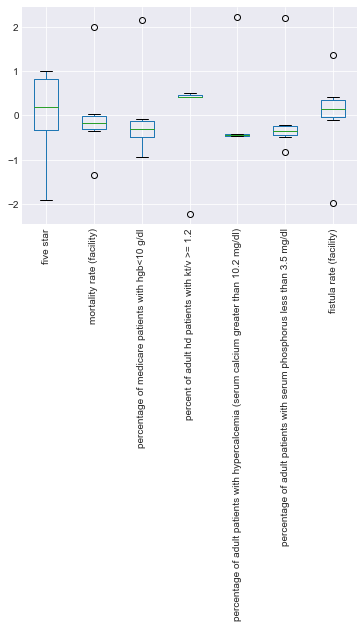

<Figure size 432x288 with 0 Axes>

In [366]:
from sklearn.preprocessing import StandardScaler
df_describe = df.describe()
mascara_index = ['mean','min', '25%', '50%', '75%', 'max']
df_desc_summ = df_describe.loc[mascara_index, ["five star",
             "mortality rate (facility)",
             "percentage of medicare patients with hgb<10 g/dl",
             "percent of adult hd patients with kt/v >= 1.2",
             "percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)",
             "percentage of adult patients with serum phosphorus less than 3.5 mg/dl",
             "fistula rate (facility)"]]
columnas_describe = df_desc_summ.columns
# display(df_desc_summ)
data = df_desc_summ.to_numpy()
data = StandardScaler().fit_transform(data)
df_desc_summ = pd.DataFrame(data=data, columns=columnas_describe)
df_desc_summ.boxplot()
plt.xticks(rotation=90)
plt.show()
plt.clf()


In [387]:
df_scatter = df.groupby(["state"]).agg({"five star":["mean", "std", "max", "min", "count"],
                                          "mortality rate (facility)": ["mean", "std", "max", "min", "count"]
                                          })
df_scatter.columns

MultiIndex([(                'five star',  'mean'),
            (                'five star',   'std'),
            (                'five star',   'max'),
            (                'five star',   'min'),
            (                'five star', 'count'),
            ('mortality rate (facility)',  'mean'),
            ('mortality rate (facility)',   'std'),
            ('mortality rate (facility)',   'max'),
            ('mortality rate (facility)',   'min'),
            ('mortality rate (facility)', 'count')],
           )

In [367]:
"""c = ["five star",
             "mortality rate (facility)",
             "percentage of medicare patients with hgb<10 g/dl",
             "percent of adult hd patients with kt/v >= 1.2",
             "percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)",
             "percentage of adult patients with serum phosphorus less than 3.5 mg/dl"]
plt.tight_layout()
pairplot = sns.pairplot(df[["five star",
             "mortality rate (facility)",
             "percentage of medicare patients with hgb<10 g/dl",
             "percent of adult hd patients with kt/v >= 1.2",
             "percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)",
             "percentage of adult patients with serum phosphorus less than 3.5 mg/dl"]])
#pairplot.set(xticklabels=[], yticklabels=[], xlabel="", ylabel="")
for axis in pairplot.axes.flatten():
    axis.set_xlabel(axis.get_xlabel(), rotation=30, size=8, loc="left")
    axis.set_ylabel(axis.get_ylabel(), rotation=30, size=8, labelpad=10)
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
# pairplot.set_xlabels(rotation=30)
plt.show()"""

'c = ["five star",\n             "mortality rate (facility)",\n             "percentage of medicare patients with hgb<10 g/dl",\n             "percent of adult hd patients with kt/v >= 1.2",\n             "percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)",\n             "percentage of adult patients with serum phosphorus less than 3.5 mg/dl"]\nplt.tight_layout()\npairplot = sns.pairplot(df[["five star",\n             "mortality rate (facility)",\n             "percentage of medicare patients with hgb<10 g/dl",\n             "percent of adult hd patients with kt/v >= 1.2",\n             "percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)",\n             "percentage of adult patients with serum phosphorus less than 3.5 mg/dl"]])\n#pairplot.set(xticklabels=[], yticklabels=[], xlabel="", ylabel="")\nfor axis in pairplot.axes.flatten():\n    axis.set_xlabel(axis.get_xlabel(), rotation=30, size=8, loc="left")\n    ax

Se puede observar que un 92% de los centros médicos tienen una calificación mayor a 3.
El mayor número de centros médicos se encuentran en el bucket de calificación entre 3 y 4 puntos con un total de 2291.


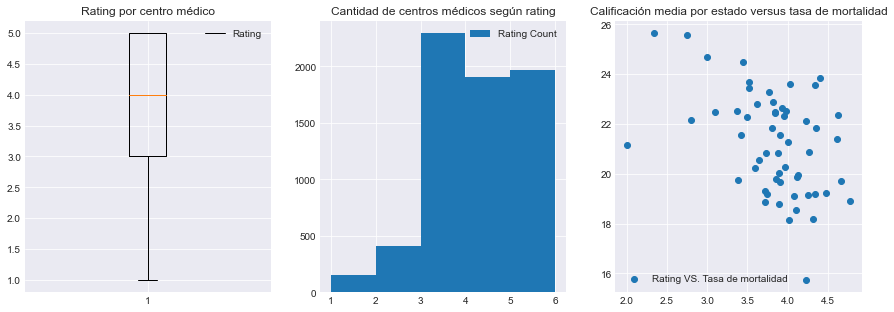

In [397]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.boxplot(df["five star"])
n, bins, patches = ax2.hist(df["five star"], bins=[1,2,3,4,5,6])
df_scatter = df.groupby(["state"]).agg({"five star":["mean", "std", "max", "min", "count"],
                                          "mortality rate (facility)": ["mean", "std", "max", "min", "count"]
                                          })
ax3.scatter(df_scatter[("five star",  "mean")], df_scatter[("mortality rate (facility)", "mean")])
ax1.legend(["Rating"])
ax2.legend(["Rating Count"])
ax3.legend(["Rating VS. Tasa de mortalidad"])
for i in range(len(patches)):
    plt.annotate(str(int(n[i])), xy=(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height()), 
                 ha='center', va='bottom')
ax1.set_title("Rating por centro médico")
ax2.set_title("Cantidad de centros médicos según rating")
ax3.set_title("Calificación media por estado versus tasa de mortalidad")

print(f"Se puede observar que un {sum(n[2:])/sum(n):.0%} de los centros médicos tienen una calificación mayor a {bins[2]}.\n"
        f"El mayor número de centros médicos se encuentran en el bucket de calificación entre {bins[2]} y {bins[3]} puntos "
        f"con un total de {n[2]:.0f}.")

In [369]:
display(df.groupby(["profit or non-profit"]).agg({"five star":["mean", "std", "max", "min", "count"],
                                          "mortality rate (facility)": ["mean", "std", "max", "min", "count"]
                                          }))

five star                            \
                          mean       std  max  min count   
profit or non-profit                                       
Non-profit            3.626248  1.148960  5.0  1.0   701   
Profit                3.777446  0.995706  5.0  1.0  6030   

                     mortality rate (facility)                             
                                          mean       std   max  min count  
profit or non-profit                                                       
Non-profit                           20.685159  5.537066  54.5  5.5   694  
Profit                               21.313338  5.223741  57.3  1.5  6028

In [ ]:
ratings_by_state = df.groupby(["state"]).agg({"five star":["mean", "std", "max", "min", "count"]})

print(f"There are {len(ratings_by_state)} states with Medicare dialysis facilities")

print(f"NaN values per column\n{ratings_by_state.isna().sum()}")

ratings_by_state[("five star", "perc_total_ratings")] = round(ratings_by_state[('five star', 'count')].apply(lambda x: x / ratings_by_state[('five star', 'count')].sum()), 2)

ratings_by_state = ratings_by_state.sort_values(by=("five star", "perc_total_ratings"), ascending=False)

display(ratings_by_state.head(10))

print("Top 10 states with the highest average rating:")
display(ratings_by_state.sort_values(by=("five star", "mean"), ascending=False).head(10))

print("Top 10 states with the lowest average rating:")
display(ratings_by_state.sort_values(by=("five star", "mean"), ascending=False).tail(10))